# COGS 108 - EDA Checkpoint

## Names
- Mariam Bachar (A16217374)
- Alexandra Hernandez (A16730685)
- Brian Kwon (A16306826)
- Andrew Uhm (A16729684)
- Ethan Wang (A17229824)

## Research Question

Do certain keywords as identified by CLIP correlate with the popularity (as measured by the equivalent of “likes”) that artwork receives on social media?

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import rankdata

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from IPython.display import Image, display

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ezkiri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ezkiri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# retrieving our deviation info.
csv_file = 'deviation_info.csv'
try:
    deviation_df = pd.read_csv(csv_file)
except:
    FileNotFoundError

In [3]:
deviation_df.head()

,Deviation ID,Title,Author,Views,Favorites,Comments,URL Link,Date Posted,Height,Width,File Size,Author Watchers,Author Page Views,Author Deviations
0,6797CD44-47EA-B405-9377-5D41D83F33FE,A l'aise...,thrumyeye,2022815,31101,2385,https://www.deviantart.com/thrumyeye/art/A-l-a...,2011-02-17 23:43:04,599,900,408379,36527,1354598,2179
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,Tiger cub,Kamirah,1271452,20720,2097,https://www.deviantart.com/kamirah/art/Tiger-c...,2008-07-11 06:10:53,800,800,523370,45123,7500677,358
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,Baby Steps 0268P,Sooper-Deviant,1097719,24050,937,https://www.deviantart.com/sooper-deviant/art/...,2009-10-05 06:55:37,400,400,4493241,35586,1438276,345
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,Sky Turtle,yuumei,1056323,23103,918,https://www.deviantart.com/yuumei/art/Sky-Turt...,2014-01-23 10:46:57,532,1000,390864,397714,22504533,842
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,Riders,sandara,1240225,15643,512,https://www.deviantart.com/sandara/art/Riders-...,2013-09-30 23:37:02,770,1200,832434,212588,7566524,796


In [4]:
# retrieving our CLIP caption info.
csv_file = 'caption_info.csv'
try:
    caption_df = pd.read_csv(csv_file)
except FileNotFoundError:
    caption_df = pd.DataFrame()

In [5]:
caption_df.head()

,Deviation ID,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,a red fox is sitting in the grass and looking ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,a tiger sitting on top of a rock in a forest w...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,a red panda cub walking on a tree branch in th...
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,a bird flying through the air with its wings s...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,a man riding on the back of a horse next to a ...


## Data Cleaning

We have previously checked for N/A values to drop and have already removed duplicates when constructing our datasets. There's still a couple of things to do; first, let's join our dataframes together based on their common ID for easier usage later:

In [6]:
# joining the two dataframes for good measure.
df = pd.merge(deviation_df, caption_df, on='Deviation ID', how='inner')
df.head()

,Deviation ID,Title,Author,Views,Favorites,Comments,URL Link,Date Posted,Height,Width,File Size,Author Watchers,Author Page Views,Author Deviations,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,A l'aise...,thrumyeye,2022815,31101,2385,https://www.deviantart.com/thrumyeye/art/A-l-a...,2011-02-17 23:43:04,599,900,408379,36527,1354598,2179,a red fox is sitting in the grass and looking ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,Tiger cub,Kamirah,1271452,20720,2097,https://www.deviantart.com/kamirah/art/Tiger-c...,2008-07-11 06:10:53,800,800,523370,45123,7500677,358,a tiger sitting on top of a rock in a forest w...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,Baby Steps 0268P,Sooper-Deviant,1097719,24050,937,https://www.deviantart.com/sooper-deviant/art/...,2009-10-05 06:55:37,400,400,4493241,35586,1438276,345,a red panda cub walking on a tree branch in th...
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,Sky Turtle,yuumei,1056323,23103,918,https://www.deviantart.com/yuumei/art/Sky-Turt...,2014-01-23 10:46:57,532,1000,390864,397714,22504533,842,a bird flying through the air with its wings s...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,Riders,sandara,1240225,15643,512,https://www.deviantart.com/sandara/art/Riders-...,2013-09-30 23:37:02,770,1200,832434,212588,7566524,796,a man riding on the back of a horse next to a ...


We want to anonymize the data to maintain ethical integrity as discussed in our project proposal. Let's remove the Author field, as it doesn't contribute anything otherwise. We don't need the URL anymore and it also reveals the author on top of that, so we remove it too. We are essentially using the caption in place of the title, so we will disregard it. We also acknowledge that webpage "views" can be manipulated by bots. The views on the deviation (read: artwork) are still relevant despite knowing that, but the views on the Author's page matter less so. Let's remove that also:

In [7]:
df = df.drop('URL Link', axis=1)
df = df.drop('Author', axis=1)
df = df.drop('Author Page Views', axis=1)
df = df.drop('Title', axis=1)

In [8]:
df.head()

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,2022815,31101,2385,2011-02-17 23:43:04,599,900,408379,36527,2179,a red fox is sitting in the grass and looking ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,1271452,20720,2097,2008-07-11 06:10:53,800,800,523370,45123,358,a tiger sitting on top of a rock in a forest w...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,1097719,24050,937,2009-10-05 06:55:37,400,400,4493241,35586,345,a red panda cub walking on a tree branch in th...
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,1056323,23103,918,2014-01-23 10:46:57,532,1000,390864,397714,842,a bird flying through the air with its wings s...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,1240225,15643,512,2013-09-30 23:37:02,770,1200,832434,212588,796,a man riding on the back of a horse next to a ...


We can justify the rest of the columns. We need the ID for identification purposes. The title may relate to the CLIP caption. The views, favorites, and comments are how we are gauging the popularity of the post. The date posted is relevant for trend analysis. The file size, height, and width implies the rendering definition (e.g. 1080px) of the work. Author watchers and deviations may imply how much experience or traction this author has had on DeviantArt. Finally, the CLIP caption is integral to our hypothesis.

Now we consider adjusting the string-based content of our data. Below we notice that the AI caption is longer than we need it to be:

In [9]:
for n in range(0, 1000, 200):
    print(df['Caption'][n])
    print()

a red fox is sitting in the grass and looking at the camera with a sad look on its face, Arie Smit, animal photography, a stock photo, furry art

a drawing of a bunch of arrows with different designs on them and numbers on them, all of which are different, Évariste Vital Luminais, tarot card, concept art, symbolism

a painting of a winged creature standing in a forest next to a lake with a waterfall in the background, Bastien Lecouffe-Deharme, magic the gathering artwork, concept art, fantasy art

a drawing of a umbrella and a clock on a book page with a pen and ink drawing of a woman holding an umbrella, Farel Dalrymple, illustrated, a storybook illustration, pop surrealism

a drawing of a woman with blue hair and a blue eyeliner on a notebook with a pen and a pen, Android Jones, trending on art station, a watercolor painting, process art



Notice that mainly what is before the first comma is the only relevant part of the caption. Furthermore, the AI makes a guess at who made the picture after the first comma. Let's remove everything after the first comma:

In [10]:
for n in range(df['Caption'].size):
    before_comma = df['Caption'][n].split(",")[0]
    df.loc[n, 'Caption'] = before_comma

In [11]:
df['Caption'][30]

'a forest with a lot of trees and snow on the ground and sun shining through the trees and the ground'

Now the caption is much more precise. However, we do not want the stopwords such as "a", "is", "the", etc. within our analysis, as they are irrelevant. Let's remove them:

In [12]:
stopwords = set(stopwords.words('english'))

In [13]:
for n in range(df['Caption'].size):
    tokens = word_tokenize(df['Caption'][n])
    filtered_text = [word for word in tokens if word not in stopwords]
    if "'s" in filtered_text:
        filtered_text.remove("'s")
    filtered_text = list(set(filtered_text))
    filtered_caption = ' '.join(filtered_text)
    df.loc[n, 'Caption'] = filtered_caption

In [14]:
df['Caption'][30]

'forest sun trees shining ground lot snow'

This will do.

## Data Analysis and Results

The first step of our Data Analysis would be to determine the popularity metric by using views, favorites, and comments fields. This way, we can dive deeper into our analysis and explore 3 main popularity trends: fileSizeAndQuality, authorExperience, and the AICaption.

Next, we will run a statistical test to see whether popularity IS NOT related to fileSizeAndQuality or authorExperience, and if popularity IS related to the AICaption. It's not critical that these statistical tests pass, rather we just need the results to evaluate whether our hypothesis is true or false;

We predict that digital artwork that contains certain keywords as predicted by CLIP (painting vs. watercolor vs. digital) will indeed have a positive correlation to popularity on social media. As humans observing what is popular, we notice that certain features tend to repeat themselves across posts, which leads us to believe a correlation will be found.

In [15]:
df.head()

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,2022815,31101,2385,2011-02-17 23:43:04,599,900,408379,36527,2179,camera look grass face looking sitting sad red...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,1271452,20720,2097,2008-07-11 06:10:53,800,800,523370,45123,358,leaves sitting neck around forest rock top tig...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,1097719,24050,937,2009-10-05 06:55:37,400,400,4493241,35586,345,tree cub panda branch forest red walking
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,1056323,23103,918,2014-01-23 10:46:57,532,1000,390864,397714,842,sky birds wings air spread flying bird around lot
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,1240225,15643,512,2013-09-30 23:37:02,770,1200,832434,212588,796,next snowy man surface horse flying bird back ...


We first need to define a popularity metric in order to do meaningful analysis. We explore the views, favorites, comments, and author watcher fields to get an idea of what a reasonable metric to measure popularity would look like.

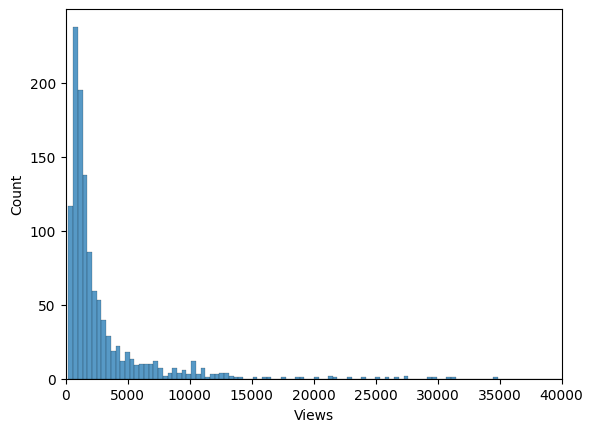

In [16]:
sns.histplot(df['Views']/100)
plt.xlim(0, 40000)
plt.show()

The plot shown above is a histogram of the artwork views divided by 100. The x-axis represents the range of views, while the y-axis represents the frequency or count of artworks falling within each range. The majority of artworks fall between 0 and 5000 views.

In terms of the research question and hypothesis, the histogram provides an overview of the distribution of artwork views on social media. By examining the histogram, we can analyze the relationship between the popularity of artwork (measured by views) and the keywords present in the artwork captions.

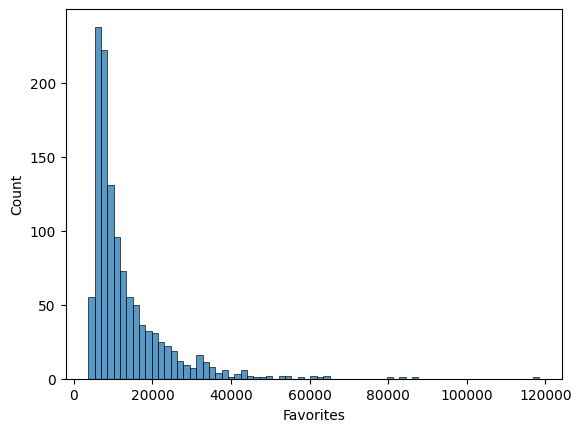

In [17]:
sns.histplot(df['Favorites'])
plt.show()

The plot shown is a histogram of the number of favorites (equivalent to "likes") received by the artworks. The histogram allows us to examine the relationship between the popularity of the artworks (measured by the number of favorites) and the keywords present in their captions. The x-axis represents the range of favorites, while the y-axis represents the frequency or count of artworks falling within each range. As one can see, majority of art received favorites between 5000 to 15000.

By looking at the histogram, we can gain insights into how artworks are being received by the audience in terms of favorites. The distribution of favorites can indicate whether certain artworks are more popular or resonate better with the viewers.

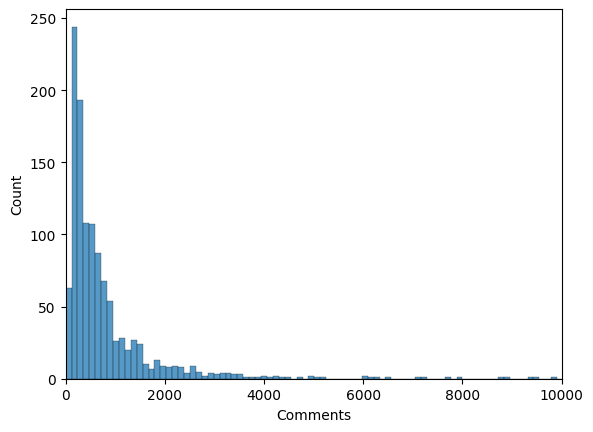

In [18]:
sns.histplot(df['Comments'])
plt.xlim(0, 10000)
plt.show()

The plot shown is a histogram of the number of comments received by the artworks. Similar to the previous plot, the x-axis represents the range of comments, while the y-axis represents the frequency or count of artworks falling within each range, with the majority falling between 0 and 1000 comments.

Analyzing this plot in relation to the research question and hypothesis, it provides an overview of the distribution of comments received by the artworks on social media. The histogram allows us to examine the relationship between the engagement level of the artworks (measured by the number of comments) and the keywords present in their captions.

We notice that the distribution for views, favorites, and comments are all similar but differ obviously on the scale. There are a handful of outliers here and there (two points at around 10 million and 6 million are excluded in the views plot and around 5 points above 10 thousand were excluded in the comments plot), but for the most part most people do not get a lot of interaction on their posts (which is how popularity intuitively works).

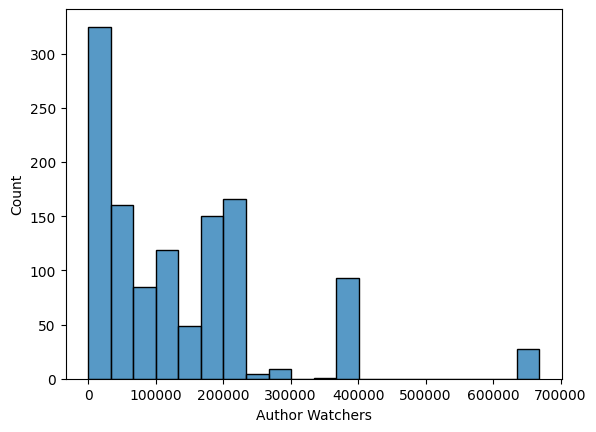

In [19]:
sns.histplot(df['Author Watchers'])
plt.show()

Author distribution is certainly not normal but not necessarily as clearly right-skewed as the popularity metrics.

We note that to put the popularity distributions on a similar scale, we can use the scale factors below:

In [20]:
view_scale_factor = 0.01
favorite_scale_factor = 1.0
comment_scale_factor = 10.0

Finally we can divide by Author Watcher count to normalize popularity based on how large a following an author already has (and thus has contributed to the popularity of the artwork):

In [21]:
popularity_metrics = []
for n in range(df.shape[0]):
    view_count = df['Views'][n]
    favorite_count = df['Favorites'][n]
    comment_count = df['Comments'][n]
    watcher_count = df['Author Watchers'][n]
    popularity_metric = (view_count*view_scale_factor + favorite_count*favorite_scale_factor + comment_count*comment_scale_factor) / watcher_count
    popularity_metrics.append(popularity_metric * 10)

In [22]:
popularity_metric_df = pd.DataFrame(popularity_metrics).rename(columns={0: 'Popularity Metric'})
popularity_metric_df.describe()

,Popularity Metric
count,1188.000000
mean,46.593045
std,340.959089
min,0.134138
25%,0.723449
50%,1.690288
75%,7.912631
max,6759.395455


In [23]:
df = pd.concat([df, popularity_metric_df], axis=1)

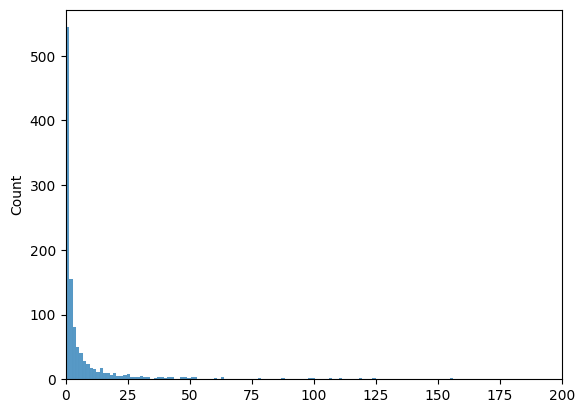

In [24]:
sns.histplot(popularity_metrics)
plt.xlim(0, 200)
plt.show()

Now that we've made a best attempt at normalizing our popularity data, we want to convert it into rank statistics, as popularity data is inherently ordinal in nature if we're sampling starting from the most popular (not to mention we have some pretty wild outliers). We'll use scipy's rankdata and append that to our dataframe:

In [25]:
# flip ranks so we get the highest metric = rank 1
ranks = len(df) + 1 - rankdata(df['Popularity Metric'])
df['Rank'] = ranks

In [26]:
df.head(3)

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption,Popularity Metric,Rank
0,6797CD44-47EA-B405-9377-5D41D83F33FE,2022815,31101,2385,2011-02-17 23:43:04,599,900,408379,36527,2179,camera look grass face looking sitting sad red...,20.581803,166.0
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,1271452,20720,2097,2008-07-11 06:10:53,800,800,523370,45123,358,leaves sitting neck around forest rock top tig...,12.056938,236.0
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,1097719,24050,937,2009-10-05 06:55:37,400,400,4493241,35586,345,tree cub panda branch forest red walking,12.476027,232.0


Just as a curiosity, let's order by ranking and see some of the most popular (as defined by us, of course) works:

In [27]:
sorted_df = df.sort_values('Rank').reset_index(drop=True)
sorted_df.head(4)

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption,Popularity Metric,Rank
0,AF3C97E9-AC22-5FC2-200A-9F7DD0DF4E32,165801,26104,1685,2006-11-03 22:12:37,56,99,16277,66,109,picture planet caption pluto either quote 's,6759.395455,1.0
1,60740003-A0C3-5C99-5B55-A7C90A33EB70,2985059,23246,6544,2007-10-14 19:57:15,56,99,4778,202,171,picture two characters different stamp,5868.148020,2.0
2,921BD7C7-0F3E-4102-993C-89EB397F409D,95259,11764,729,2009-01-13 12:31:37,55,99,6993,40,100,trouble music says face picture real reality s...,5001.647500,3.0
3,BB8400B2-75DA-4876-178E-91C0516EBEA0,263967,5051,593,2006-07-13 01:29:25,450,540,178631,46,2,fence snow tree covered lit trees christmas ba...,2961.015217,4.0


picture planet caption pluto either quote 's


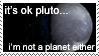

In [28]:
# deviation with the highest popularity metric
most_popular_id = sorted_df.loc[0][0]
most_popular_index = sorted_df[sorted_df['Deviation ID'] == f'{most_popular_id}'].index[0]
print(sorted_df[sorted_df['Deviation ID'] == f'{most_popular_id}'].loc[most_popular_index][10])
display(Image(filename=f'./images/{most_popular_id}.png', width=300))

fence snow tree covered lit trees christmas background night


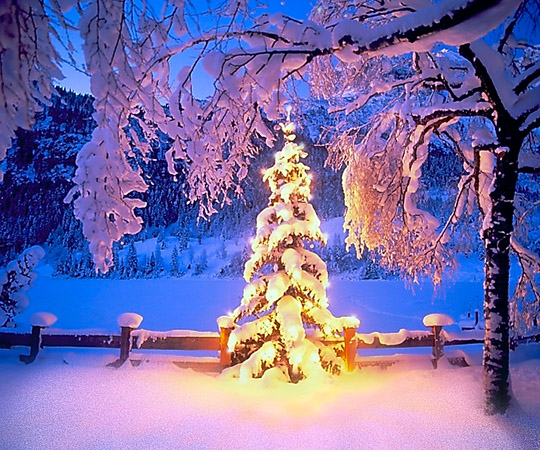

In [29]:
# deviation with the fourth highest popularity metric
# ...choosing the fourth since second and third place are both also "stamp" memes like the most popular
second_most_popular_id = sorted_df.loc[3][0]
second_most_popular_index = sorted_df[sorted_df['Deviation ID'] == f'{second_most_popular_id}'].index[0]
print(sorted_df[sorted_df['Deviation ID'] == f'{second_most_popular_id}'].loc[second_most_popular_index][10])
display(Image(filename=f'./images/{second_most_popular_id}.png', width=400))

In [30]:
# NEW TODO:
# PRIO NO. 1: make a plot that relates the KEYWORDS to POPULARITY.
# PRIO NO. 2: find the statistical TEST that allows us to link popularity and the AI caption. 
    # REMEMBER that the test could find that there is no relation!

# SECONDARY PRIOS:
# plot out popularity trends based on DATE
# do the same plots for (primary prio) fileSizeAndQuality and (secondary prio) authorExperience like we did for AICaption.
# do statistical tests that show fileSizeAndQuality and authorExperience are NOT related to the popularity 
    # (which implies that the caption is good at predicting popularity on its own)
    # REMEMBER that the test could find that there is a relation for the other stuff! it's OK!
    
# TERTIARY PRIOS:
# need to remove punctuation from the captions

In [31]:
# unique is a dict that contains a list of tuples of (Deviation ID, Popularity Metric, Rank) for each unique word in our df.
# the frequency of a key (word) is the length.
unique = {}
for n in range(df.shape[0]):
    tokens = word_tokenize(df['Caption'][n])
    for word in tokens:
        if word in unique:
            unique[word].append((df['Deviation ID'][n], df['Popularity Metric'][n], df['Rank'][n]))
        else:
            # tuple that contains (freq, deviation ID)
            unique[word] = [(df['Deviation ID'][n], df['Popularity Metric'][n], df['Rank'][n])]

In [32]:
# for example:
unique['branch']

[('8F1ED8A1-88A5-861A-F83B-77916A1481A0', 12.476027089304784, 232.0),
 ('A77528CF-7D8B-734F-09FF-A20F273E1F1F', 7.015633847961964, 317.0),
 ('7FCBF6C1-783A-4AE4-8322-9991CD34253A', 5.820496637351268, 351.0),
 ('7E879736-6DBA-5262-6935-8D22F87D8AED', 1.0930396852849613, 726.0),
 ('5C1F6B9A-2224-E9B4-D7BA-4DB93FE0FEDD', 1.5863297221131412, 620.0),
 ('6F78458E-4DCA-C156-2566-AE328D9EB766', 3.9502426515777653, 421.0),
 ('0086BEF0-C182-912F-7CB2-1D743B720A99', 11.729583395254373, 241.0),
 ('FFC323F3-B917-3DC2-77BB-5242E98BE18D', 3.615618583513566, 439.0),
 ('CC7A161D-CF1F-B0C9-8D29-D963389B209C', 1.3735208245391868, 670.0),
 ('75993019-BCDB-7871-83D2-F041ABC813CD', 0.26823879417680296, 1175.0),
 ('5E0C9B16-41D4-3108-8F1D-127FFBCECE06', 4.111395013393777, 415.0),
 ('AA879A6F-958B-28D4-3DDA-FB1180CDA983', 0.9120141224503455, 807.0),
 ('46FE4F99-5800-E659-DC5A-42004B32C686', 0.454380814439307, 1084.0),
 ('CC01191D-DAB5-C75D-1654-CF4CA0E1DA83', 1.8236498116016189, 576.0),
 ('386964D4-B1EA-BE42-

## Machine Learning Training Attempts

Below here is basically just messing with machine learning to see if we can train a model to predict popularity based on the tokens associated with an image.

In [33]:
#BELOW HERE IS JUST MODEL FITTING STUFF.
#Import a bunch of stuff.
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import math
import random
import statsmodels.api as sm
import patsy

In [34]:
#setting up vectorizers
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        analyzer='word', 
                        tokenizer=word_tokenize, 
                        stop_words=stopwords.words("english"))

count = CountVectorizer(analyzer='word',
                        tokenizer=word_tokenize,
                        stop_words=stopwords.words("english"))
#making the training_tfidf of the training data.
#set the seed value
#seed_value = random.randint(0, 99999)

#scrambled_df = df.sample(frac=1.0, random_state=seed_value)
#actually, we're not scrambling.
scrambled_df = df
training_df = scrambled_df[:-100]

training_tfidf = pd.DataFrame(tfidf.fit_transform(training_df['Caption'].tolist()).toarray(), 
                             index=training_df['Deviation ID'], 
                             columns=tfidf.get_feature_names_out())
training_count = pd.DataFrame(count.fit_transform(training_df['Caption'].tolist()).toarray(),
                             index=training_df['Deviation ID'],
                             columns=count.get_feature_names_out())

C:\Users\Ezkiri\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Ezkiri\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(
C:\Users\Ezkiri\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Ezkiri\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 's

In [35]:
#setting up model, fitting it to our caption_tfidf as input data and the popularity metric as the output.
tfidfModel = DecisionTreeRegressor()
tfidfModel.fit(training_tfidf, training_df['Popularity Metric'])
#setting up countModel
countModel = DecisionTreeRegressor()
countModel.fit(training_count, training_df['Popularity Metric'])
#setting a linear regression model just to see
linearModel = LinearRegression()
linearModel.fit(training_tfidf, training_df['Popularity Metric'])
#setting up an SGDRegressor better suited for sparse space
lassoModel = Lasso()
lassoModel.fit(training_tfidf, training_df['Popularity Metric'])

#test set is just what we didn't include in the training set, make it a suitable input to model
#and then make predictions.
test_df = scrambled_df[-100:]
#
test_tfidf = pd.DataFrame(tfidf.transform(test_df['Caption'].tolist()).toarray(), 
                          index=test_df['Deviation ID'], 
                          columns=tfidf.get_feature_names_out())
test_count = pd.DataFrame(count.transform(test_df['Caption'].tolist()).toarray(), 
                          index=test_df['Deviation ID'], 
                          columns=tfidf.get_feature_names_out())
#setting up prediction arrays
tfidf_pred = tfidfModel.predict(test_tfidf)
count_pred = countModel.predict(test_count)
#
linearTfidf_pred = linearModel.predict(test_tfidf)
#
lasso_pred = lassoModel.predict(test_tfidf)

In [37]:
#here we can compare if the model actually was able to predict anything.
mean = training_df['Popularity Metric'].mean()
median = training_df['Popularity Metric'].median()
amount = len(test_df)
tfidfModel_sum = 0
countModel_sum = 0 
linearTfidf_sum = 0 
lasso_sum = 0 
mean_sum = 0
median_sum = 0
zero_sum = 0
for i in range(amount):
    #print("Expected: ", y_pred[i], "Actual: ", test_set['Popularity Metric'].iloc[i])
    tfidfModel_sum += abs(tfidf_pred[i] - test_df['Popularity Metric'].iloc[i])
    countModel_sum += abs(count_pred[i] - test_df['Popularity Metric'].iloc[i])
    linearTfidf_sum += abs(linearTfidf_pred[i] - test_df['Popularity Metric'].iloc[i])
    lasso_sum += abs(lasso_pred[i] - test_df['Popularity Metric'].iloc[i])
    mean_sum += abs(test_df['Popularity Metric'].iloc[i] - mean)
    median_sum += abs(test_df['Popularity Metric'].iloc[i] - median)
    zero_sum += abs(test_df['Popularity Metric'].iloc[i] - 0)

print("Tree TF-IDF Mean Loss: ", tfidfModel_sum / amount)
print("Tree Count Mean Loss: ", countModel_sum / amount)
print("Linear TF-IDF Mean Loss: ", linearTfidf_sum / amount)
print("Lasso TF-IDF Mean Loss: ", lasso_sum / amount)
print("Mean Mean Loss: ", mean_sum / amount)
print("Median Mean Loss: ", median_sum / amount)
print("Zero Mean Loss: ", zero_sum / amount)

Tree TF-IDF Mean Loss:  36.69845946304682
Tree Count Mean Loss:  32.92780107152852
Linear TF-IDF Mean Loss:  603304090652243.2
Lasso TF-IDF Mean Loss:  59.648842071899296
Mean Mean Loss:  62.17771847333244
Median Mean Loss:  27.083543430342015
Zero Mean Loss:  27.6165530293289


Here we can see that the loss on the models generally tends to be higher (way higher for Linear models) than simply guessing the mean, median, or zero. This means our models are unable to effectively guess the popularity of something based on the keywords describing it. This does not imply that the features don't have any relationship to the popularity metric, but that so far we cannot relate them meaningfully.

In [38]:
tfidf_feature_importances = tfidfModel.feature_importances_
count_feature_importances = countModel.feature_importances_

feature_names_tfidf = tfidf.get_feature_names_out()
feature_names_count = count.get_feature_names_out()

tfidf_feature_importances_mapping = dict(zip(feature_names_tfidf, tfidf_feature_importances))
count_feature_importances_mapping = dict(zip(feature_names_count, count_feature_importances))

tfidf_feature_importances_mapping

{'&': 0.0,
 "'m": 0.0,
 "'s": 8.134822395079648e-07,
 '-': 4.4665348980371215e-08,
 '13th': 0.0,
 '17': 0.0,
 '?': 3.294893112874943e-08,
 'abstract': 0.0,
 'across': 0.0,
 'air': 5.216431388232734e-07,
 'alien': 1.501257349596658e-07,
 'alligator': 0.0,
 'alone': 0.0,
 'also': 0.0015651837751896052,
 'amount': 0.0,
 'angel': 0.0,
 'angles': 0.0,
 'animal': 0.0,
 'animals': 3.4835855773220183e-06,
 'animated': 0.0,
 'animation': 0.0,
 'anime': 4.38398184271595e-11,
 'another': 5.2437458720710296e-12,
 'antlers': 0.0,
 'app': 0.0,
 'appears': 0.0,
 'arcane': 0.0,
 'area': 8.72578444178066e-11,
 'arm': 7.912901335476998e-08,
 'armor': 0.0,
 'arms': 1.542903607336005e-12,
 'around': 0.0023811990264703178,
 'arrangement': 8.115114166354672e-05,
 'arrow': 0.0,
 'arrows': 0.0,
 'art': 0.0,
 'artist': 0.0,
 'assisted': 0.0,
 'attached': 0.0,
 'attacking': 0.0,
 'auditorium': 0.0,
 'aurora': 0.0,
 'auroras': 0.0,
 'autumn': 0.0,
 'away': 0.0,
 'baadi': 6.748478902800119e-10,
 'baby': 2.3330837

We can look at the features and their importance here, I chose the most successful model for this. As said previously,t his model doesn't guess better than just guessing the median so it's doubtful that these feature importances are meaningful.

In [39]:
X = training_tfidf.reset_index()
X = X.iloc[:, 1:]
X = sm.add_constant(X)
X, y = X.align(training_df['Popularity Metric'], axis=0)

statsmodel = sm.OLS(y, X)
result = statsmodel.fit()

print(result.summary())
print(result.f_pvalue)

                            OLS Regression Results                            
Dep. Variable:      Popularity Metric   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           8.56e-72
Time:                        00:09:25   Log-Likelihood:                -5586.7
No. Observations:                1088   AIC:                         1.297e+04
Df Residuals:                     188   BIC:                         1.747e+04
Df Model:                         899                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            166.3494     72.479      2.

I also tried to run the OLS model on my vectorized input and output, but I got an incredibly small f_p value which implies that there is a strong predictor here, which goes against my previous results. More investigation is to be done on this.

In order to observe the data and to see the effects of keywords on popularity, we decided to aggregate all of the popularity data into a single dataframe with only the popularity values paired with keywords. In order to determine the popularity of a keyword, we decided to take the average of the popularities of each keyword and use that value to determine the overall popularity. We also removed all words that appeared less than 3 times in order to remove some inconsistent words that had high popularity rankings that appeared very few times. In order to do this, we used the values from the dictionary unique to create the new dataframe. We also did a log on the data in order to further deal with outliers.

In [40]:
words = []
pop_val = []
sums = 0.0
for word in unique:
    words.append(word)
    for values in unique[word]:
        sums += values[1]
    # add only if appears more than 3 times
    if (len(unique[word]) > 2):
        pop_val.append(sums/(len(unique[word])))
    sums = 0.0
keyword_pop = pd.DataFrame(list(zip(words, pop_val)))
keyword_pop.columns = ['keyword', 'popularity']
keyword_pop = keyword_pop.sort_values('popularity').reset_index(drop=True)
keyword_pop.loc[keyword_pop['keyword'] == 'branch']

,keyword,popularity
196,branch,7.769796


,keyword,popularity,logval
0,knife,0.568332,-0.565050
1,cave,0.605296,-0.502038
2,lots,0.611426,-0.491961
3,sunrise,0.631511,-0.459640
4,owls,0.666431,-0.405818
...,...,...,...
476,corn,684.624802,6.528871
477,smile,708.691812,6.563421
478,hands,738.249894,6.604282
479,drawn,1688.652855,7.431686


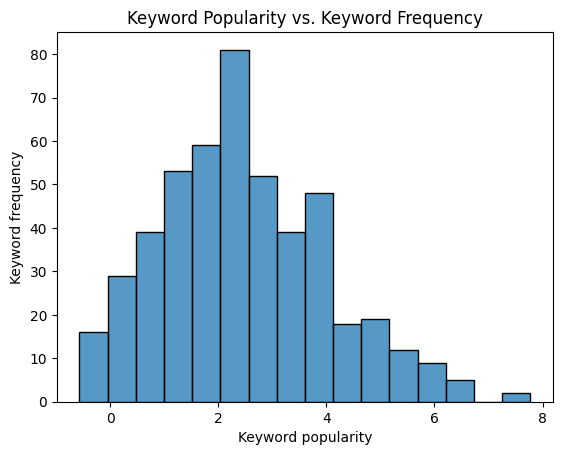

In [41]:
log_series = np.log(keyword_pop.popularity)
popularity_graph = sns.histplot(log_series)

# setting titles for clarification
popularity_graph.set_title('Keyword Popularity vs. Keyword Frequency')
popularity_graph.set_xlabel('Keyword popularity')
popularity_graph.set_ylabel('Keyword frequency')

keyword_pop['logval'] = log_series
keyword_pop

From this graph, the most "popular" keywords (such as "arms") appear the **LEAST** in frequency, whereas lower to middle end popular keywords are more frequent in DeviantArt posts. Overall, the graph of popular keywords and their frequency is normally distributed. 

It should be noted that the aggregation of keyword frequency is made up of multiple keywords with similar popularity ratings, giving the rise of either low, middle, or high frequency. Furthermore, the most popular keywords show up in the least amount of DeviantArt posts, so we can see that keywords may possibly *not* drive a post's popularity overall.